# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 1. Data Preparation

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [7]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


### Step 2. K-NN

In [9]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

### Step 3 : Make Predictions 

In [10]:
pred = knn(X_train,Y_train,X_test[1])

print(int(pred))

7


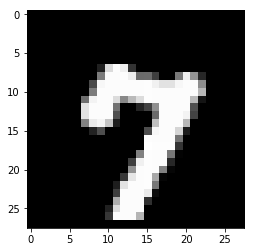

7


In [11]:

drawImg(X_test[1])
print(Y_test[1])